# ***Línea 144 - Grupo 2***
---
La Línea 144 brinda atención telefónica especializada a mujeres víctimas de violencia de género durante las 24 horas, los 365 días del año.
Ofrece información, contención y asesoramiento en aquellas temáticas relacionadas con la violencia física, psicológica, sexual, económica y patrimonial, y simbólica. Su objetivo es acompañar en las distintas situaciones, ya sea antes, durante o después de un episodio de violencia.
El dataset recopila la información recuperada de la página https://datos.gob.ar/ consolidando desde el 2020 hasta el 2023.

Dataset: https://www.kaggle.com/datasets/aracelifernandez/base-de-datos-linea-144-argentina<br>
Información de columnas: https://www.datos.gob.ar/dataset/generos-base-datos-linea-144/archivo/generos_1.4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, roc_curve, roc_auc_score, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/df_final.csv', delimiter = ',')

In [ ]:
pd.options.display.max_columns = None # Muestra todas las columnas al imprimir df

In [ ]:
df

,prov_persona_en_situacion_violencia,edad_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,vinculo_con_la_persona_agresora
0,0,19.0,1,1,1,0,0,0,2
1,0,46.0,1,1,0,0,1,1,5
2,7,28.0,0,0,0,0,1,1,5
3,12,34.0,0,0,0,0,0,1,0
4,0,38.0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
63140,0,36.0,0,0,0,0,1,1,5
63141,0,30.0,1,1,0,0,1,1,5
63142,0,22.0,1,1,0,0,1,1,0
63143,0,44.0,1,1,0,0,1,1,0


In [ ]:
df['tipo_de_violencia_fisica'].value_counts() / len(df)

,count
tipo_de_violencia_fisica,
1,0.690395
0,0.309605


In [ ]:
df['tipo_de_violencia_psicologica'].value_counts() / len(df)

,count
tipo_de_violencia_psicologica,
1,0.690395
0,0.309605


In [ ]:
df['tipo_de_violencia_sexual'].value_counts() / len(df)

,count
tipo_de_violencia_sexual,
0,0.847684
1,0.152316


In [ ]:
df['tipo_de_violencia_simbolica'].value_counts() / len(df)

,count
tipo_de_violencia_simbolica,
0,0.634191
1,0.365809


In [ ]:
df['tipo_de_violencia_economica_y_patrimonial'].value_counts() / len(df)

,count
tipo_de_violencia_economica_y_patrimonial,
0,0.564146
1,0.435854


# **Seleccion de target (y) y variables (X)**

* Variable objetivo (y) es tipo_de_violencia_fisica, esta variable indica si la mujer ha sufrido violencia fisica (1) o no (0).

* Variables predictoras (X): Todas las demás variables del DataFrame, excepto las variables tipo_de_violencia_fisica.

In [ ]:
# Selección de la variable objetivo
y = df['tipo_de_violencia_fisica']

# Selección de las variables predictoras
X = df.drop(columns=['tipo_de_violencia_fisica'])

In [ ]:
X.columns

Index(['prov_persona_en_situacion_violencia',
       'edad_persona_en_situacion_de_violencia',
       'tipo_de_violencia_psicologica', 'tipo_de_violencia_sexual',
       'tipo_de_violencia_economica_y_patrimonial',
       'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
       'vinculo_con_la_persona_agresora'],
      dtype='object')

# **Separando Train / Test**

Se dividen los datos en dos conjuntos, 70% para el entrenamiento y 30% para prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_test.shape

(18944, 8)

# **Clasificador KNN**

## K=5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)

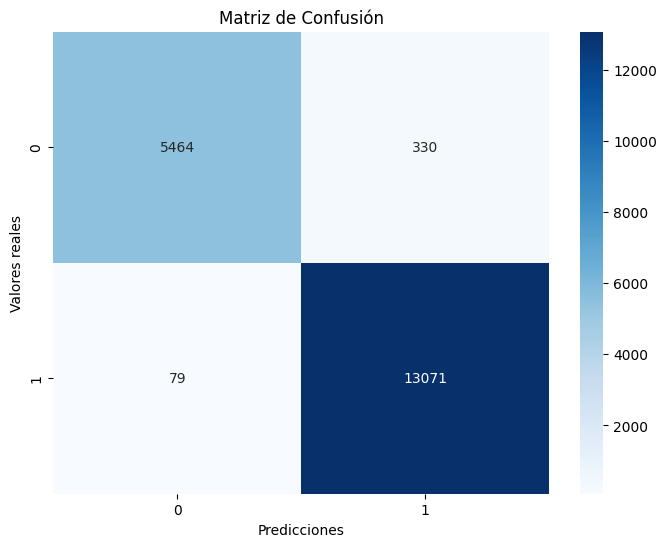

In [ ]:
matriz_confusion = confusion_matrix(y_test, y_pred_knn)
# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      5794
           1       0.98      0.99      0.98     13150

    accuracy                           0.98     18944
   macro avg       0.98      0.97      0.97     18944
weighted avg       0.98      0.98      0.98     18944

Accuracy Score: 0.9784100506756757


**Matriz de confusión**:  muestra el número de predicciones correctas e incorrectas hechas por el modelo en comparación con los valores reales.
* Verdaderos negativos = 5464 predicciones correctas de violencia fisica
* Falsos positivos = 330 predicciones incorrectas de no violencia fisica cuando en realidad era violencia fisica
* Falsos negativos = 79 predicciones incorrectas de violencia fisica cuando en realidad era no violencia fisica
* Verdaderos positivos = 13071 predicciones correctas de violencia fisica<br>
La cantidad de datos a predecir es del tamaño de 18944 muestras. El modelo predijo bien 13071 casos como violencia fisica y 5464 como no violencia fisica. Eso significa que predijo bien 18535 de 18944 totales. Consiguiendo un rendimiento (accuracy) del 97%

**Precisión:** es la proporción de verdaderos positivos sobre el total de predicciones positivas.
* Clase 0 (False) = 0.99
* Clase 1 (True) = 0.98

**Recall**: proporción de verdaderos positivos sobre el total de verdaderos positivos y falsos negativos.
* Clase 0 (False) = 0.94
* Clase 1 (True) = 0.99

**F1-score**: media armónica de la precisión y el recall.
* Clase 0 (False) = 0.96
* Clase 1 (True) = 0.98

**Soporte**: número de ocurrencias de cada clase en los datos de prueba.
* Clase 0 (False) = 5794
* Clase 1 (True) = 13150

## K=250

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=250)
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=250)

In [ ]:
y_pred_knn2 = knn.predict(X_test)

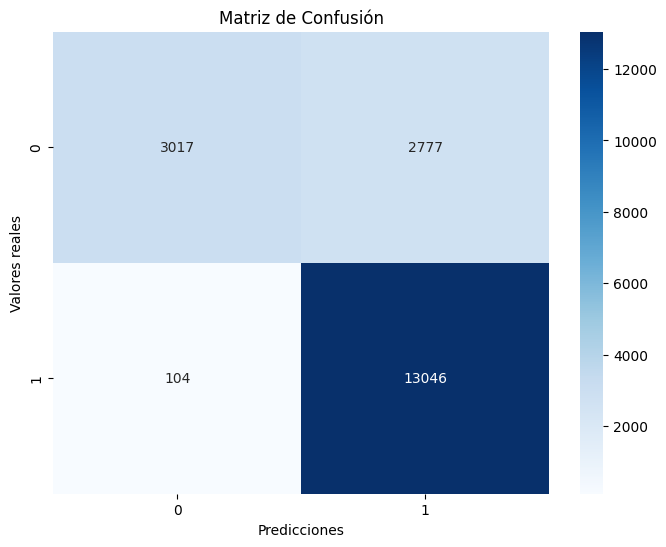

In [ ]:
matriz_confusion2 = confusion_matrix(y_test, y_pred_knn2)
# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_knn2))
print("Accuracy Score:", accuracy_score(y_test, y_pred_knn2))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.52      0.68      5794
           1       0.82      0.99      0.90     13150

    accuracy                           0.85     18944
   macro avg       0.90      0.76      0.79     18944
weighted avg       0.87      0.85      0.83     18944

Accuracy Score: 0.8479201858108109


**Matriz de confusión**:  muestra el número de predicciones correctas e incorrectas hechas por el modelo en comparación con los valores reales.
* Verdaderos negativos = 3017 predicciones correctas de violencia fisica
* Falsos positivos = 2777 predicciones incorrectas de no violencia fisica cuando en realidad era violencia fisica
* Falsos negativos = 104 predicciones incorrectas de violencia fisica cuando en realidad era no violencia fisica
* Verdaderos positivos = 13046 predicciones correctas de violencia fisica<br>
La cantidad de datos a predecir es del tamaño de 18944 muestras. El modelo predijo bien 13046 casos como violencia fisica y 2777 como no violencia fisica. Eso significa que predijo bien 15823 de 18944 totales. Consiguiendo un rendimiento (accuracy) del 84%

# **Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

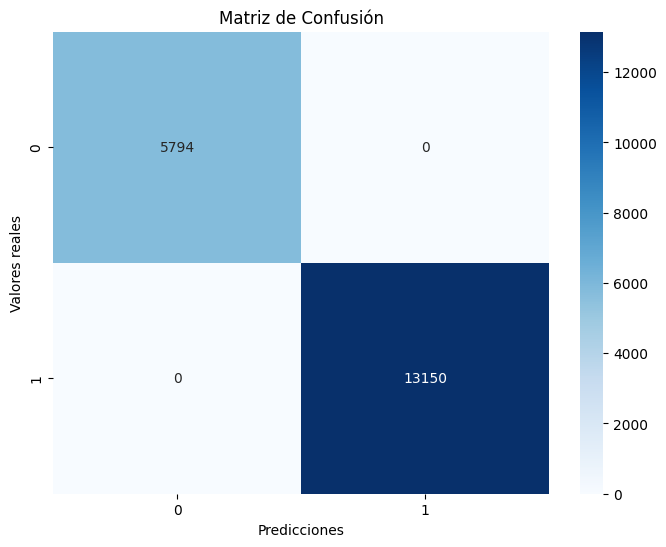

In [ ]:
matriz_confusion = confusion_matrix(y_test, y_pred_rf)
# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5794
           1       1.00      1.00      1.00     13150

    accuracy                           1.00     18944
   macro avg       1.00      1.00      1.00     18944
weighted avg       1.00      1.00      1.00     18944

Accuracy Score: 1.0
